# Recent image

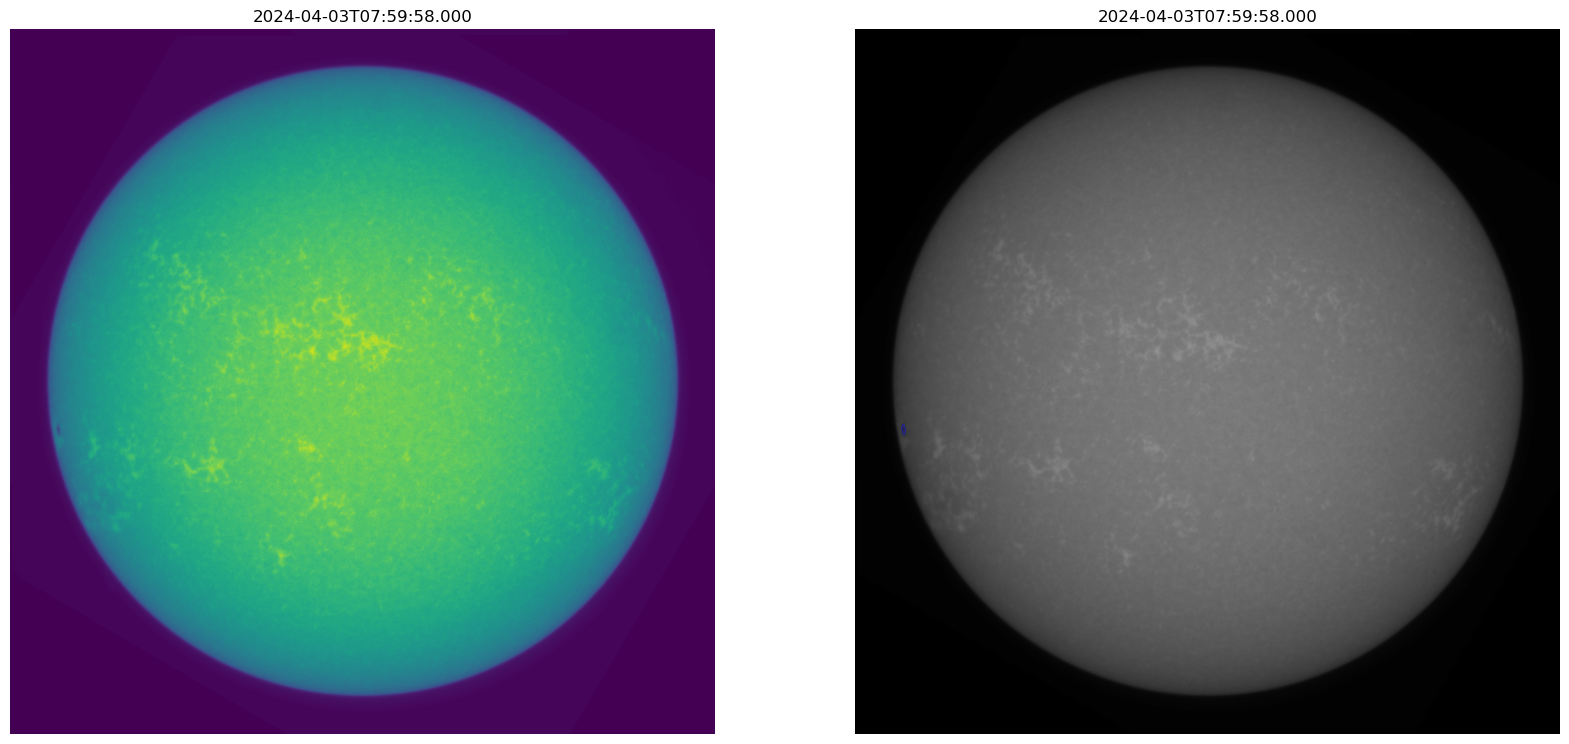

In [1]:
from module import toSunpyMap, getMostRecent, drawSunspots
import matplotlib.pyplot as plt

directory = 'Z:/data/CLIMSO/2024/data_calibrated'

file = getMostRecent(directory, '_l2_')

map = toSunpyMap(file)

img = drawSunspots(map)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(map.data)
plt.axis('off')
plt.title(map.date);

plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.title(map.date);